# Handwritten Digit Classification using KNN

In this project, we use the K-Nearest Neighbors (KNN) algorithm
to classify handwritten digits (0 to 9).

Each image is a small 8x8 grayscale picture.
The goal is to predict which digit the image represents.

## Importing Required Libraries

These libraries are used for:
- loading dataset
- visualizing images
- training models
- evaluating performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Loading the Digits Dataset

This dataset is built into sklearn.
Each image has 64 features (8x8 pixels).

In [2]:
digits = load_digits()
X = digits.data      # pixel values
y = digits.target    # labels (0–9)

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualizing Sample Digits

We display a few images to understand the data.

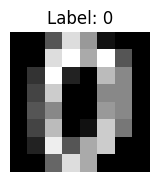

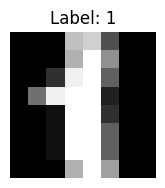

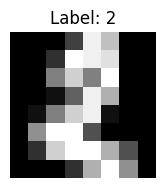

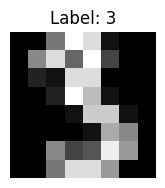

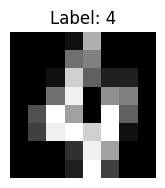

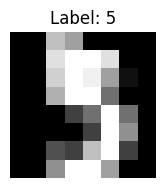

In [4]:
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
    plt.show()

## Splitting the Dataset

We keep:
- 80% for training
- 20% for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

KNN uses distance.
So all features must be on the same scale.

In [7]:
scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Transform test data using same scale
X_test = scaler.transform(X_test)

## Training KNN (K = 3)

The model looks at the 3 nearest neighbors.

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9694444444444444


## Trying Different K Values

We test which K gives best performance.

In [9]:
k_values = [3,5,7,9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

## Accuracy vs K

We visualize which K performs best.

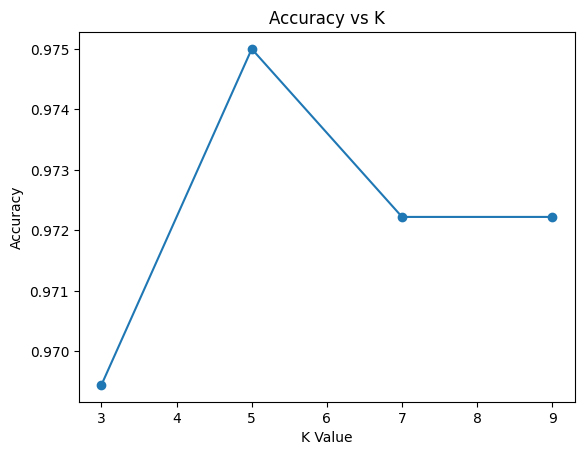

In [10]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

From the Accuracy vs K plot, we can choose the K value
that gives the highest accuracy. Very small K may overfit,
while very large K may underfit.

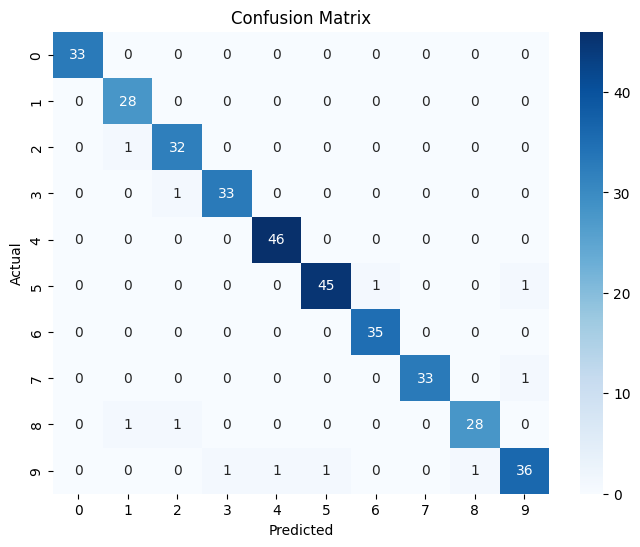

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Confusion Matrix

The confusion matrix shows which digits are commonly misclassified.
Diagonal values represent correct predictions.
Shows where the model is getting confused.

## Visualizing Predictions

We show some test images and their predicted labels.

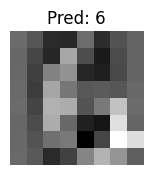

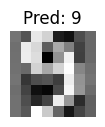

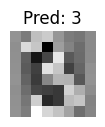

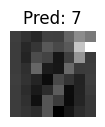

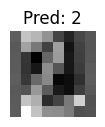

In [13]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
    plt.show()

## Final Summary

- KNN classifies digits using distance.
- Scaling is crucial for correct performance.
- Best K is chosen using accuracy plot.
- Confusion matrix shows detailed performance.
- The model performs well on handwritten digits.